IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

READING THE DATA

In [2]:
dataset = pd.read_csv('train_aWnotuB.csv')

In [3]:
#Feature Engineering
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'])
dataset['Date'] = dataset['DateTime'].dt.date
dataset['Time'] = dataset['DateTime'].dt.time
dataset['Hour'] = dataset['Time'].apply(lambda x: x.hour)
dataset['Minute'] = dataset['Time'].apply(lambda x: x.minute)
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['DayOfWeek'] = dataset['Date'].dt.day_name()
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year
dataset.drop('DateTime', axis=1, inplace=True)

READING THE DATA CONTAINING FUTURE DATES

In [4]:
dataset2 = pd.read_csv('future_data.csv')

In [5]:
dataset2['DateTime'] = pd.to_datetime(dataset2['DateTime'])
dataset2['Date'] = dataset2['DateTime'].dt.date
dataset2['Time'] = dataset2['DateTime'].dt.time
dataset2['Hour'] = dataset2['Time'].apply(lambda x: x.hour)
dataset2['Minute'] = dataset2['Time'].apply(lambda x: x.minute)
dataset2['Date'] = pd.to_datetime(dataset2['Date'])
dataset2['DayOfWeek'] = dataset2['Date'].dt.day_name()
dataset2['Month'] = dataset2['Date'].dt.month
dataset2['Year'] = dataset2['Date'].dt.year
dataset2.drop('DateTime', axis=1, inplace=True)

In [6]:
grouped_dataset2 = dataset2.groupby('Junction')
divided_datasets2 = {}
for junction, group in grouped_dataset2:
    divided_datasets2[junction] = group

junction_1_dataset2 = divided_datasets2[1]
junction_2_dataset2 = divided_datasets2[2]
junction_3_dataset2 = divided_datasets2[3]
junction_4_dataset2 = divided_datasets2[4]

UNDERSTANDING THE GIVEN DATA BY DIVIDING IT BY DIFFERENT FACTORS AND PLOTTING GRAPHS

<ipython-input-7-9e14715adf35>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_traffic = dataset.groupby(['Date', 'Junction']).sum()['Vehicles']


Date        Junction
2015-11-01  1            327
            2            133
            3            136
2015-11-02  1            546
            2            197
                        ... 
2017-06-29  4            296
2017-06-30  1           1883
            2            655
            3            553
            4            272
Name: Vehicles, Length: 2005, dtype: int64




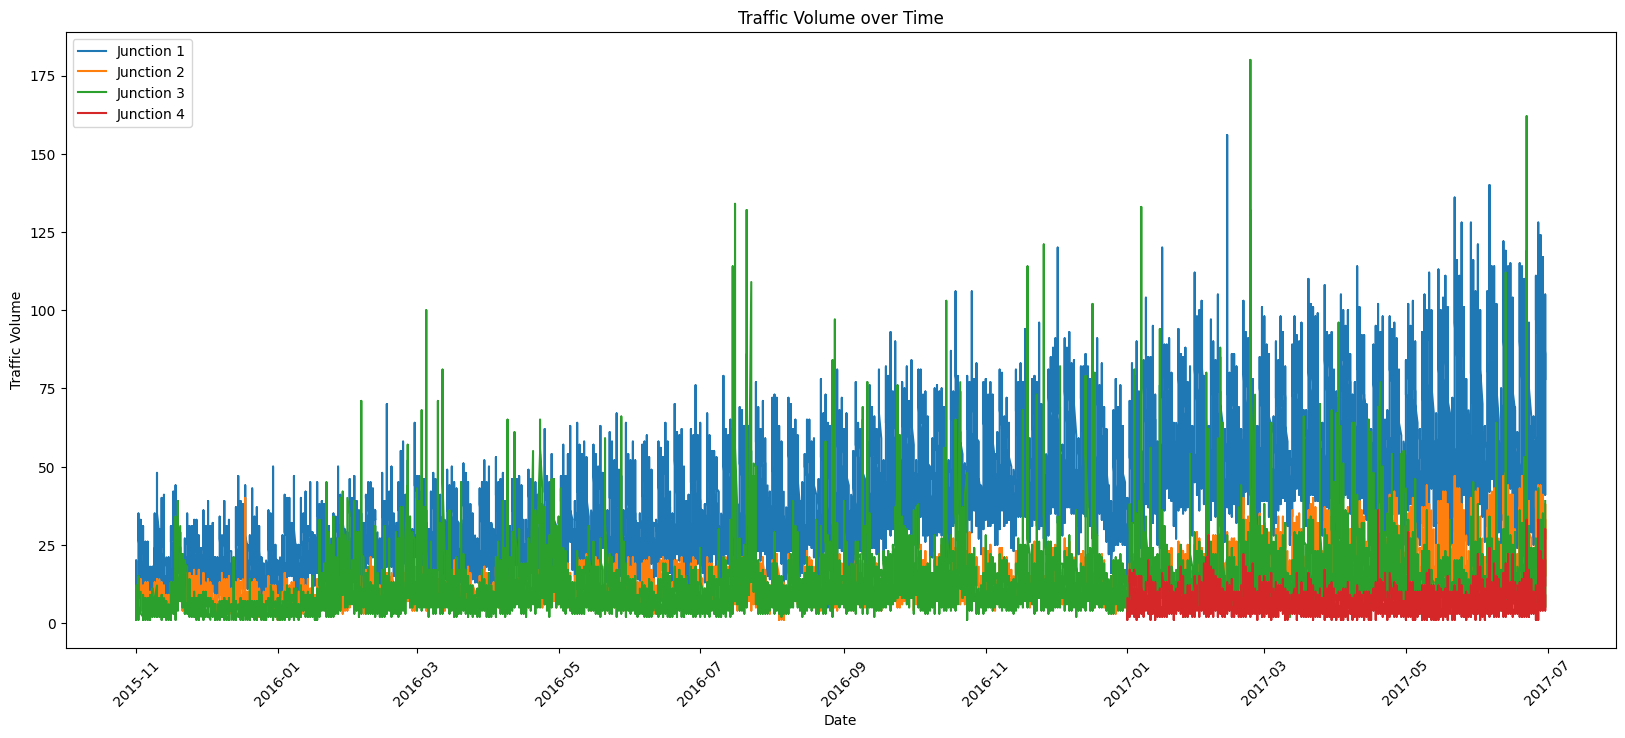

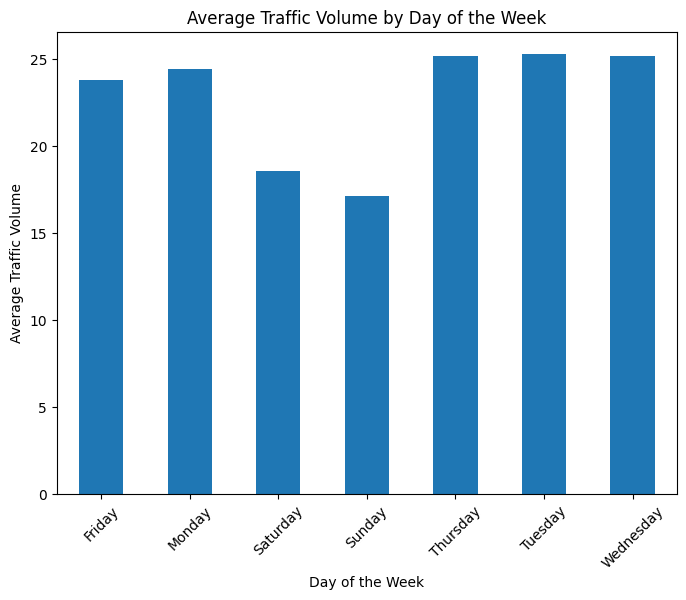

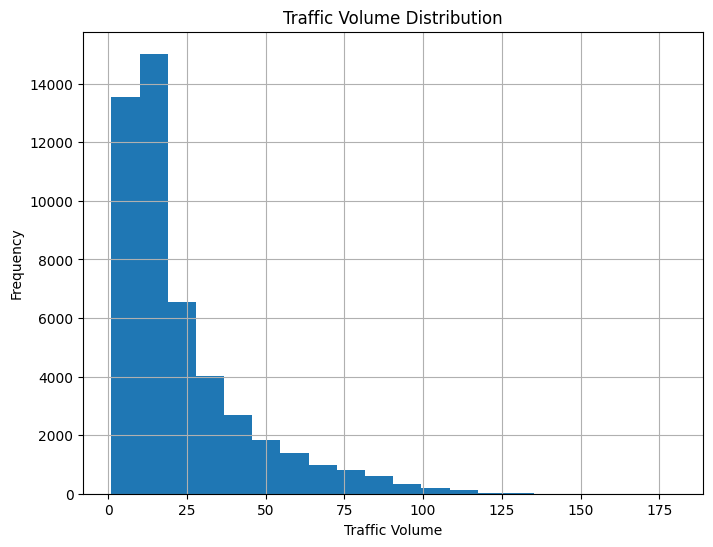



count    48120.000000
mean        22.791334
std         20.750063
min          1.000000
25%          9.000000
50%         15.000000
75%         29.000000
max        180.000000
Name: Vehicles, dtype: float64


              Hour  Minute  Vehicles
Hour      1.000000     NaN  0.219938
Minute         NaN     NaN       NaN
Vehicles  0.219938     NaN  1.000000


In [7]:
daily_traffic = dataset.groupby(['Date', 'Junction']).sum()['Vehicles']
print(daily_traffic)
print()
print()

# Line plot of traffic volume over time for each junction
plt.figure(figsize=(20, 8))
for junction in dataset['Junction'].unique():
    junction_data = dataset[dataset['Junction'] == junction]
    plt.plot(junction_data['Date'], junction_data['Vehicles'], label='Junction {}'.format(junction))

plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()
print()
print()

# Bar plot of average traffic volume by day of the week
average_traffic_by_day = dataset.groupby('DayOfWeek')['Vehicles'].mean()
plt.figure(figsize=(8, 6))
average_traffic_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Day of the Week')
plt.xticks(rotation=45)
plt.show()
print()
print()

# Histogram of traffic volume distribution
plt.figure(figsize=(8, 6))
dataset['Vehicles'].hist(bins=20)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Traffic Volume Distribution')
plt.show()
print()
print()

traffic_summary = dataset['Vehicles'].describe()
print(traffic_summary)
print()
print()

correlation_matrix = dataset[['Hour', 'Minute', 'Vehicles']].corr()
print(correlation_matrix)

DIVIDING THE DATA ACCORDING TO WEEK DAYS AND PERFORMING T-TEST

In [8]:
weekday_traffic = dataset[dataset['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['Vehicles']
weekend_traffic = dataset[dataset['DayOfWeek'].isin(['Saturday', 'Sunday'])]['Vehicles']
t_stat, p_value = ttest_ind(weekday_traffic, weekend_traffic)
print("T-statistic:", t_stat)
print("p-value:", p_value)

T-statistic: 33.40516657076176
p-value: 6.824381896010904e-242


ANALYZING THE DATA THROUGH FOLLOWING WAYS:


*   Traffic at each junction
*   Traffic on holidays
*   Traffic pattern monthwise
*   Traffic pattern on different days of weeks
*   Traffic pattern at different times of a day
*   Correlation Analysis
*   Outlier Detection







Junction
1    45.052906
2    14.253221
3    13.694010
4     7.251611
Name: Vehicles, dtype: float64




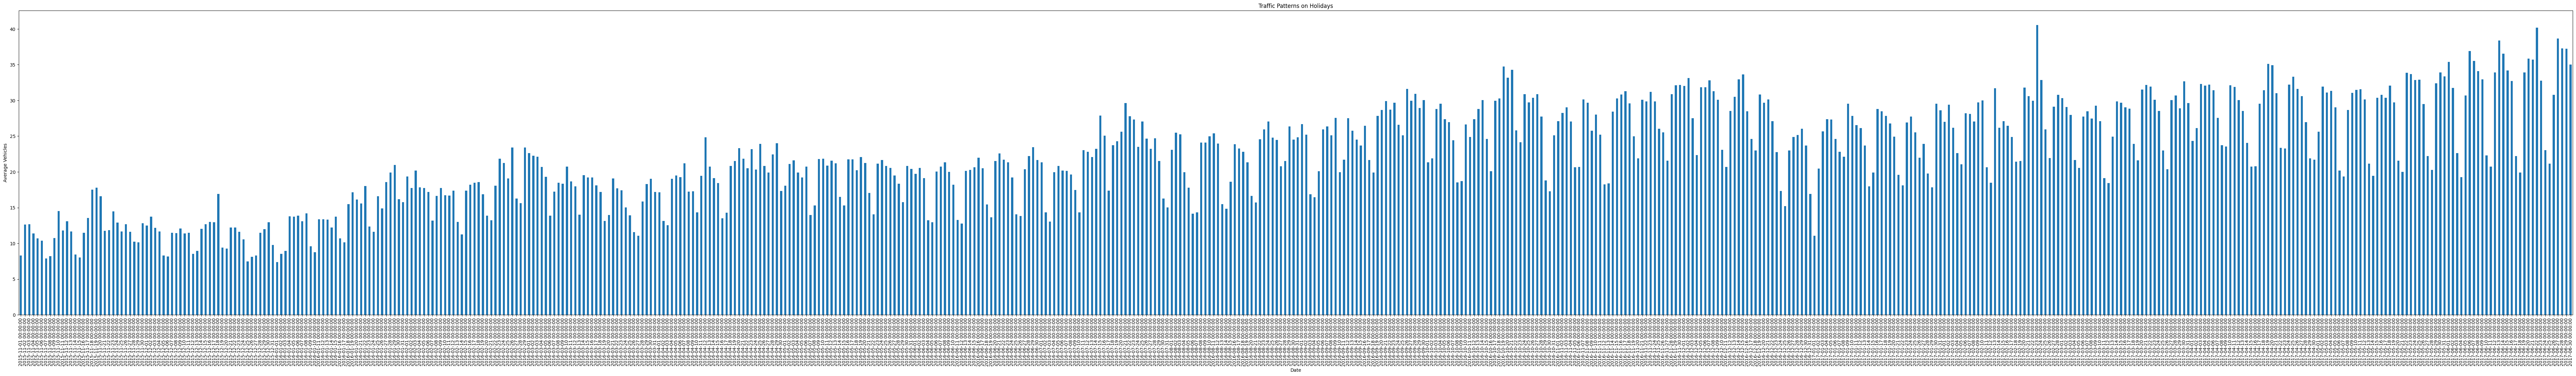

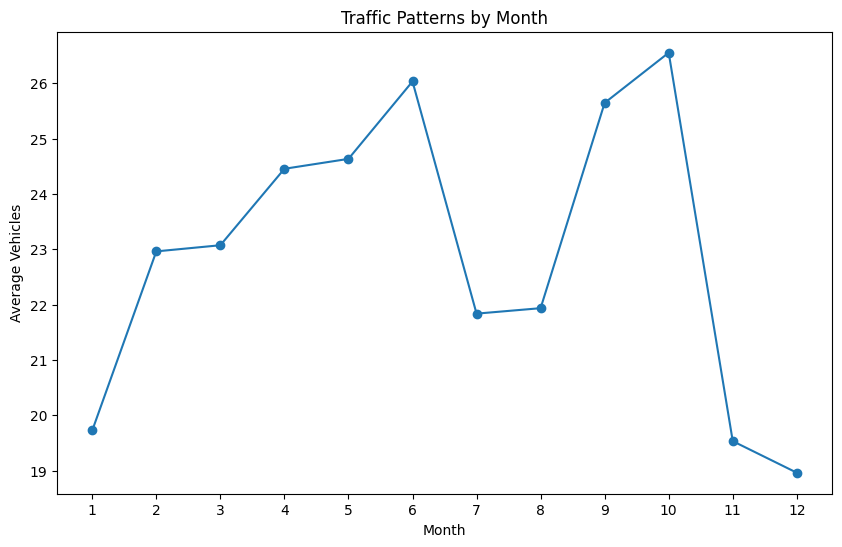

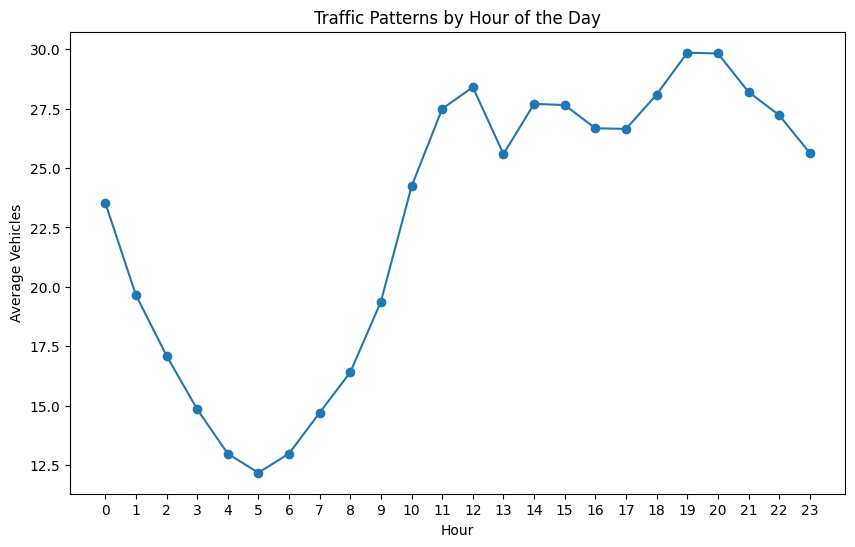

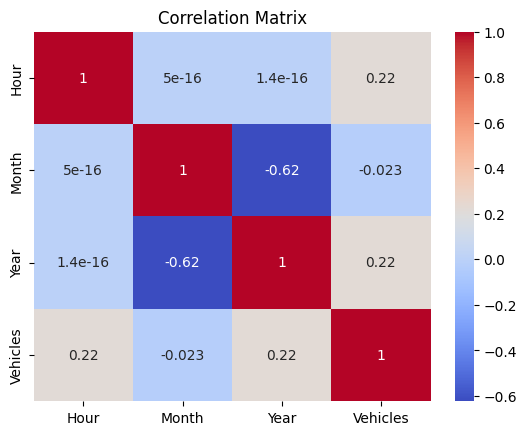

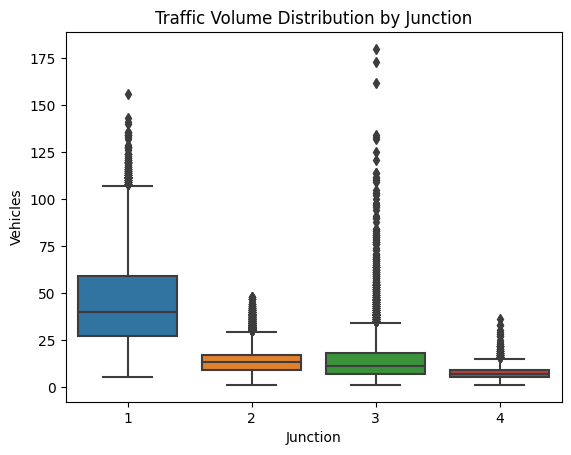

In [9]:
# Junction Analysis
junction_traffic = dataset.groupby('Junction')['Vehicles'].mean()
print(junction_traffic)
print()
print()

#Holiday Analysis
holiday_traffic = dataset.groupby('Date')['Vehicles'].mean()
holiday_traffic.plot(kind='bar', figsize=(100, 12))
plt.xlabel('Date')
plt.ylabel('Average Vehicles')
plt.title('Traffic Patterns on Holidays')
plt.show()
print()
print()

# Seasonal Analysis
monthly_traffic = dataset.groupby('Month')['Vehicles'].mean()
monthly_traffic.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Vehicles')
plt.title('Traffic Patterns by Month')
plt.xticks(range(1, 13))
plt.show()
print()
print()

# Time-of-Day Analysis
hourly_traffic = dataset.groupby('Hour')['Vehicles'].mean()
hourly_traffic.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Hour')
plt.ylabel('Average Vehicles')
plt.title('Traffic Patterns by Hour of the Day')
plt.xticks(range(24))
plt.show()
print()
print()

# Correlation Analysis
correlation_matrix = dataset[['Hour', 'Month', 'Year', 'Vehicles']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print()
print()

# Outlier Detection (using box plot)
sns.boxplot(data=dataset, x='Junction', y='Vehicles')
plt.xlabel('Junction')
plt.ylabel('Vehicles')
plt.title('Traffic Volume Distribution by Junction')
plt.show()

TRAINING AND TESTING DIFFERENT MODELS TO PREDICT FUTURE TRAFFIC PATTERNS

In [10]:
# Split the data into training and testing sets
X = dataset[['Hour', 'Month', 'Year']]
y = dataset['Vehicles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LINEAR REGRESSION MODEL

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training MAE: 14.831436585261173
Testing MAE: 14.46875969691875
Training RMSE: 19.59418031346831
Testing RMSE: 18.996156579935185


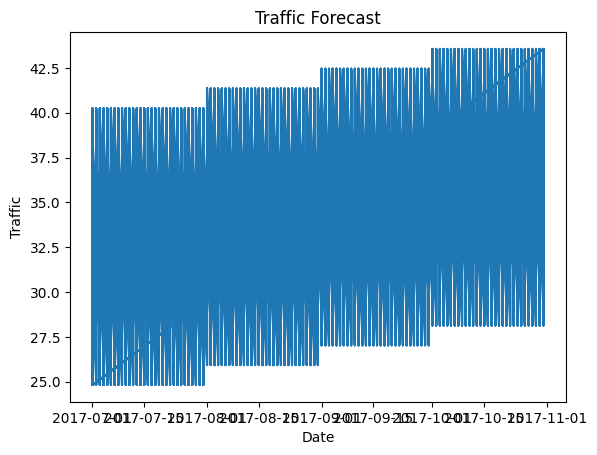

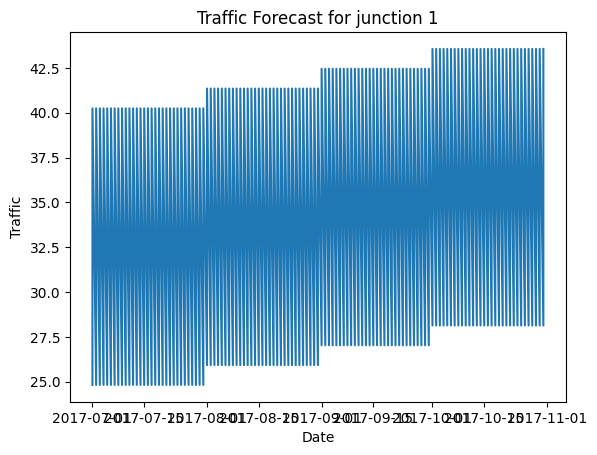

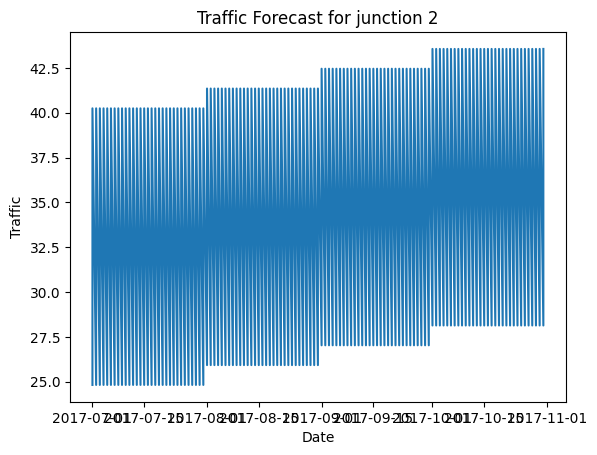

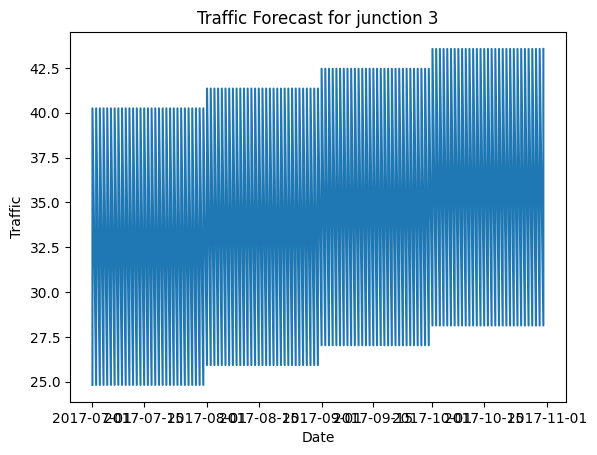

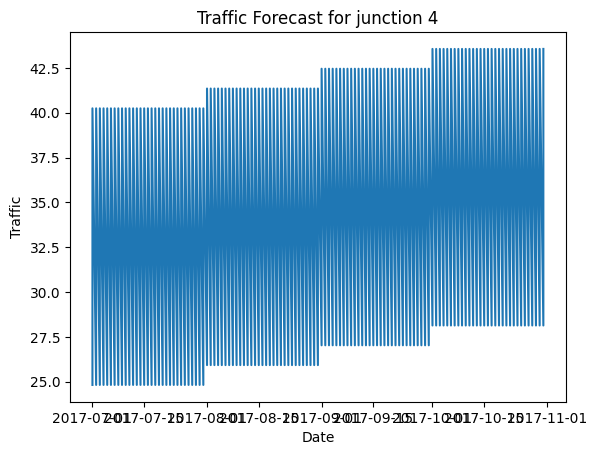

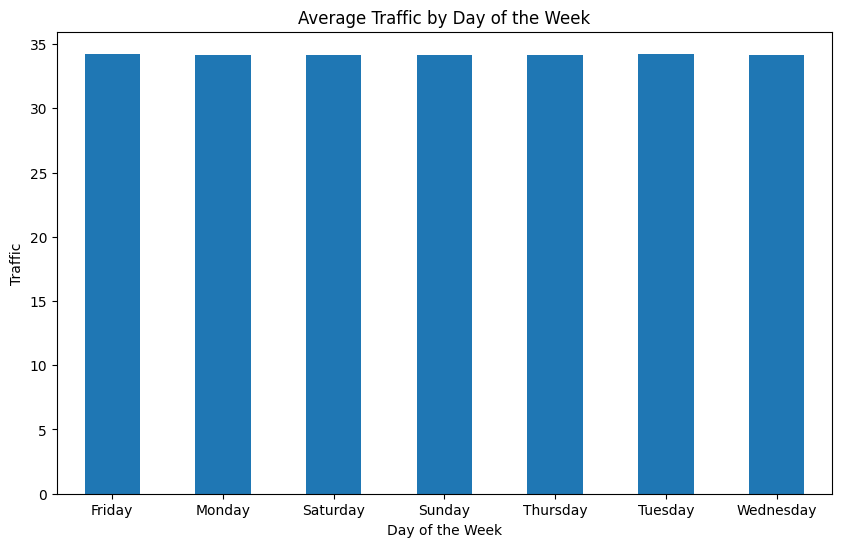

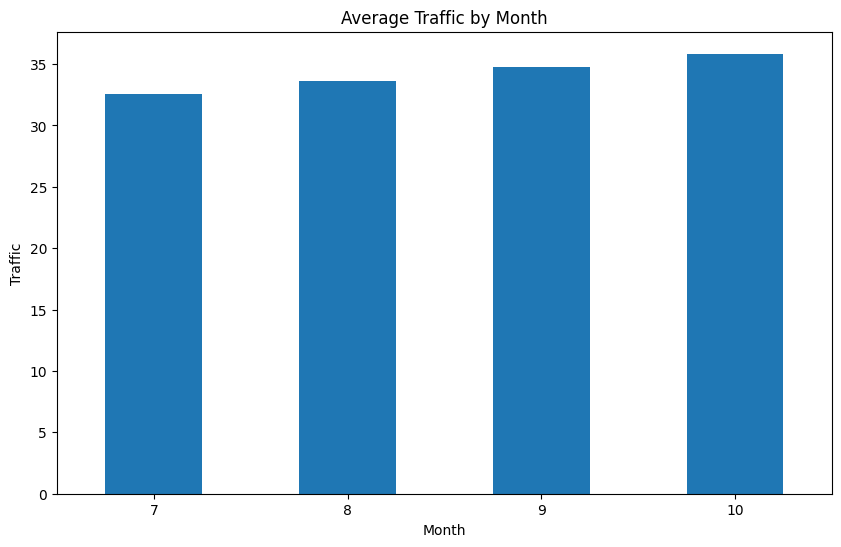

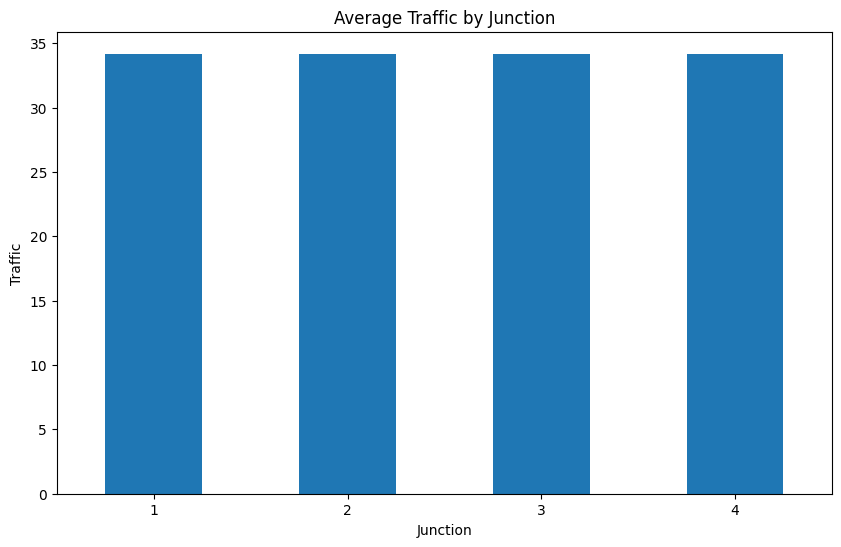

In [12]:
forecasted_traffic = model.predict(dataset2[['Hour', 'Month', 'Year']])
dataset2['Predicted_Traffic'] = forecasted_traffic
plt.plot(dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast')
plt.show()
print()
print()

forecasted_traffic = model.predict(junction_1_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_1_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 1')
plt.show()
print()
print()

forecasted_traffic = model.predict(junction_2_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_2_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 2')
plt.show()
print()
print()

forecasted_traffic = model.predict(junction_3_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_3_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 3')
plt.show()
print()
print()

forecasted_traffic = model.predict(junction_4_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_4_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 4')
plt.show()
print()
print()

# Visualize traffic on different days of the week
plt.figure(figsize=(10, 6))
daily_traffic = dataset2.groupby('DayOfWeek')['Predicted_Traffic'].mean()
daily_traffic.plot(kind='bar', rot=0)
plt.xlabel('Day of the Week')
plt.ylabel('Traffic')
plt.title('Average Traffic by Day of the Week')
plt.show()
print()
print()

# Visualize traffic in different months
plt.figure(figsize=(10, 6))
monthly_traffic = dataset2.groupby('Month')['Predicted_Traffic'].mean()
monthly_traffic.plot(kind='bar', rot=0)
plt.xlabel('Month')
plt.ylabel('Traffic')
plt.title('Average Traffic by Month')
plt.show()
print()
print()

# Visualize traffic at different junctions
plt.figure(figsize=(10, 6))
junction_traffic = dataset2.groupby('Junction')['Predicted_Traffic'].mean()
junction_traffic.plot(kind='bar', rot=0)
plt.xlabel('Junction')
plt.ylabel('Traffic')
plt.title('Average Traffic by Junction')
plt.show()

DECISION TREE MODEL

In [13]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

train_mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)

train_rmse_dt = mean_squared_error(y_train, y_train_pred_dt, squared=False)
test_rmse_dt = mean_squared_error(y_test, y_test_pred_dt, squared=False)

print("Decision Tree - Training MAE:", train_mae_dt)
print("Decision Tree - Testing MAE:", test_mae_dt)
print("Decision Tree - Training RMSE:", train_rmse_dt)
print("Decision Tree - Testing RMSE:", test_rmse_dt)

Decision Tree - Training MAE: 14.513667236847024
Decision Tree - Testing MAE: 14.354374957227932
Decision Tree - Training RMSE: 19.016704796077974
Decision Tree - Testing RMSE: 18.759390564805823


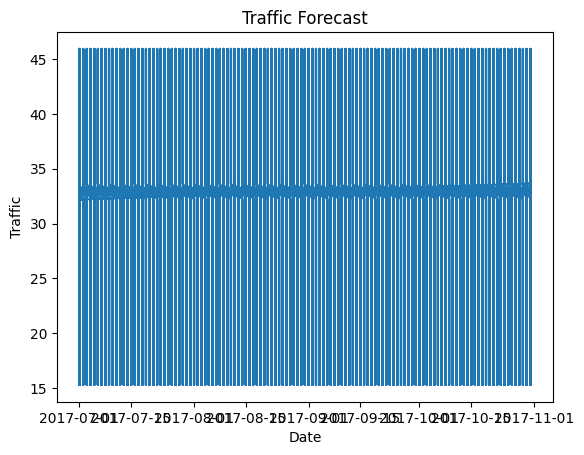

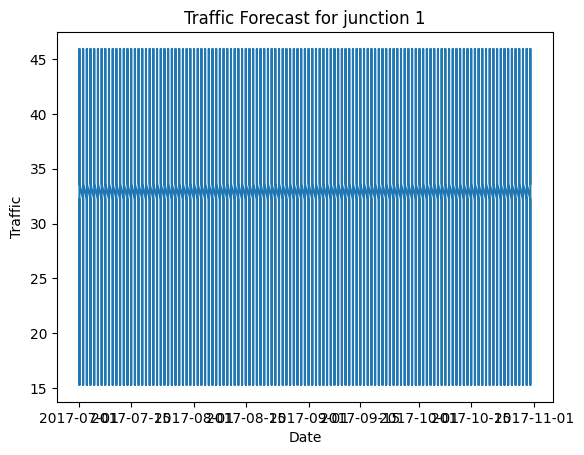

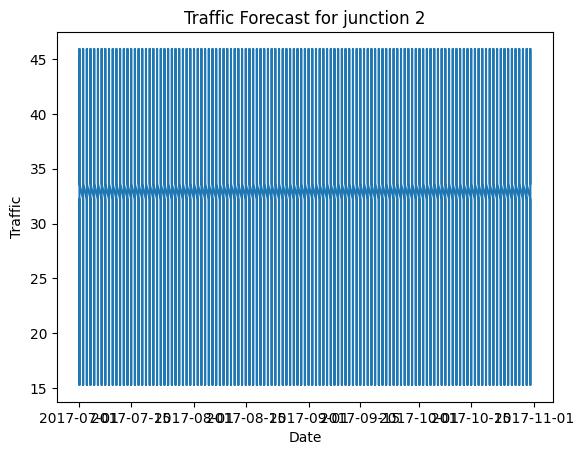

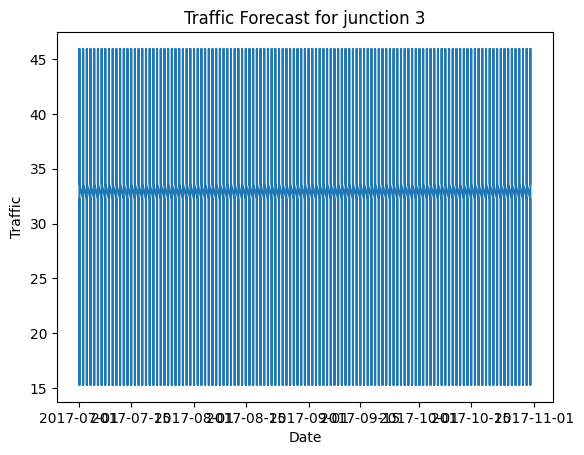

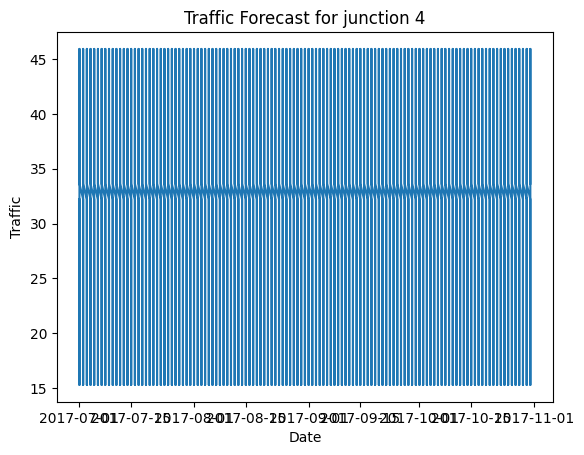

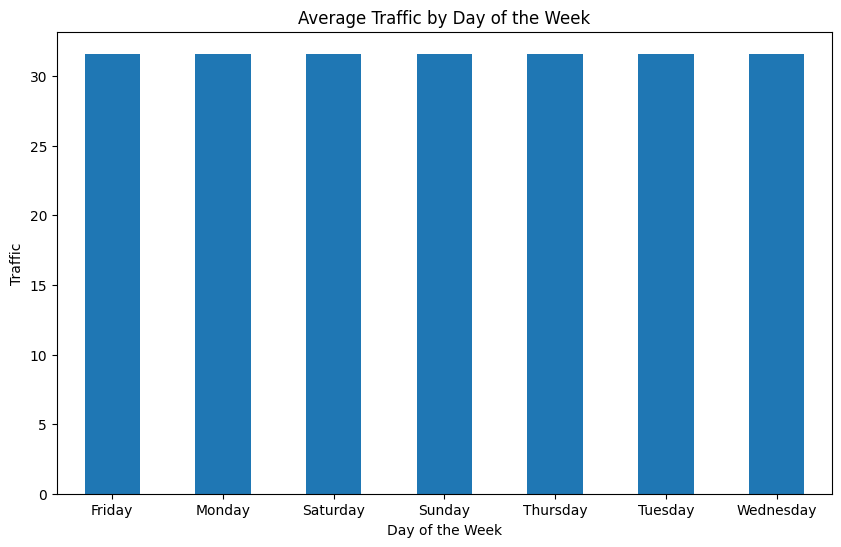

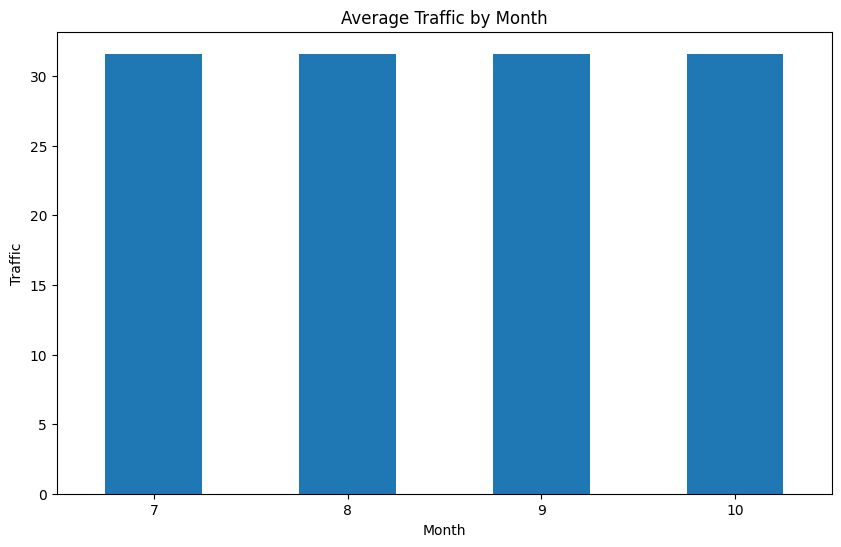

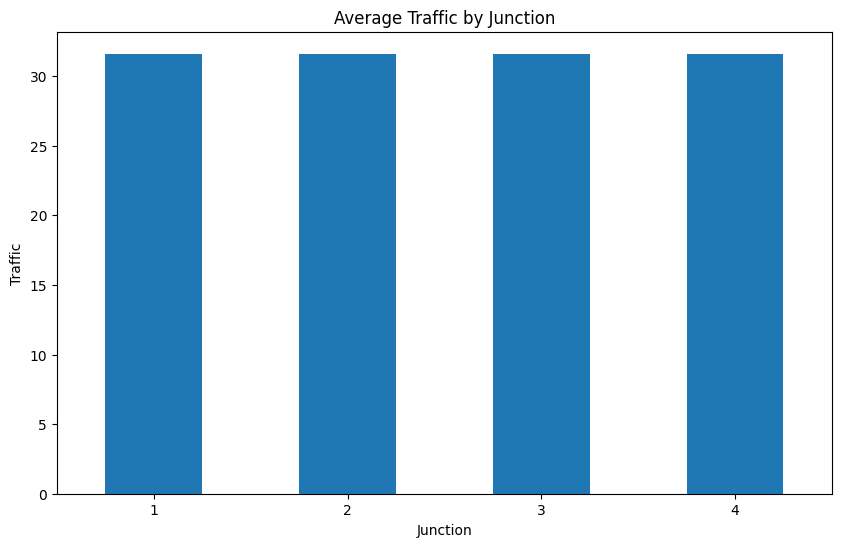

In [14]:
forecasted_traffic = dt_model.predict(dataset2[['Hour', 'Month', 'Year']])
dataset2['Predicted_Traffic'] = forecasted_traffic
plt.plot(dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast')
plt.show()
print()
print()

forecasted_traffic = dt_model.predict(junction_1_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_1_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 1')
plt.show()
print()
print()

forecasted_traffic = dt_model.predict(junction_2_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_2_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 2')
plt.show()
print()
print()

forecasted_traffic = dt_model.predict(junction_3_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_3_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 3')
plt.show()
print()
print()

forecasted_traffic = dt_model.predict(junction_4_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_4_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 4')
plt.show()
print()
print()

# Visualize traffic on different days of the week
plt.figure(figsize=(10, 6))
daily_traffic = dataset2.groupby('DayOfWeek')['Predicted_Traffic'].mean()
daily_traffic.plot(kind='bar', rot=0)
plt.xlabel('Day of the Week')
plt.ylabel('Traffic')
plt.title('Average Traffic by Day of the Week')
plt.show()
print()
print()

# Visualize traffic in different months
plt.figure(figsize=(10, 6))
monthly_traffic = dataset2.groupby('Month')['Predicted_Traffic'].mean()
monthly_traffic.plot(kind='bar', rot=0)
plt.xlabel('Month')
plt.ylabel('Traffic')
plt.title('Average Traffic by Month')
plt.show()
print()
print()

# Visualize traffic at different junctions
plt.figure(figsize=(10, 6))
junction_traffic = dataset2.groupby('Junction')['Predicted_Traffic'].mean()
junction_traffic.plot(kind='bar', rot=0)
plt.xlabel('Junction')
plt.ylabel('Traffic')
plt.title('Average Traffic by Junction')
plt.show()

RANDOM FOREST MODEL

In [15]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

train_rmse_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)

print("Random Forest - Training MAE:", train_mae_rf)
print("Random Forest - Testing MAE:", test_mae_rf)
print("Random Forest - Training RMSE:", train_rmse_rf)
print("Random Forest - Testing RMSE:", test_rmse_rf)

Random Forest - Training MAE: 14.515922217530385
Random Forest - Testing MAE: 14.35726545363492
Random Forest - Training RMSE: 19.01779334366747
Random Forest - Testing RMSE: 18.7619997334243


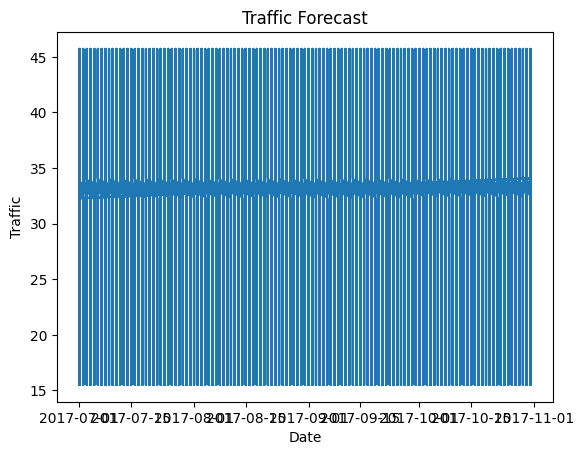

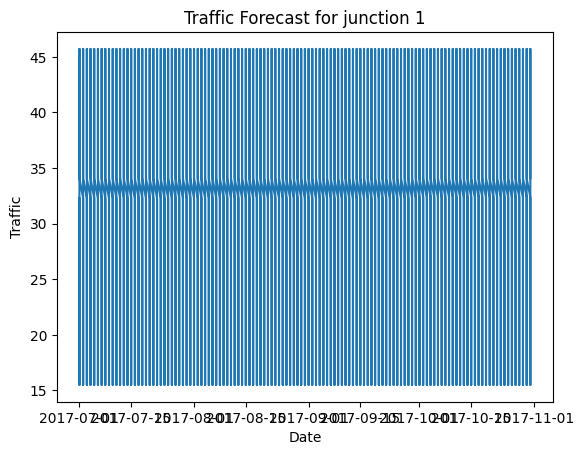

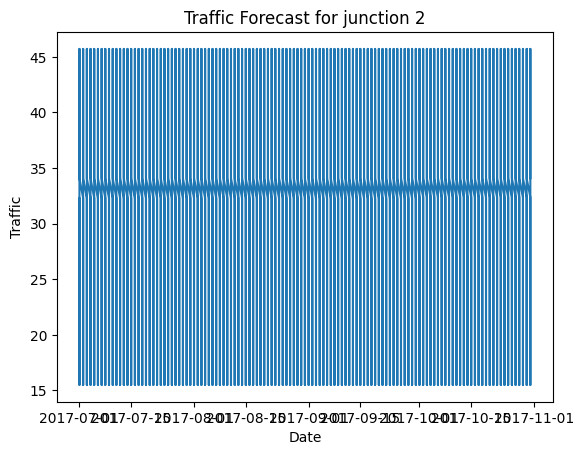

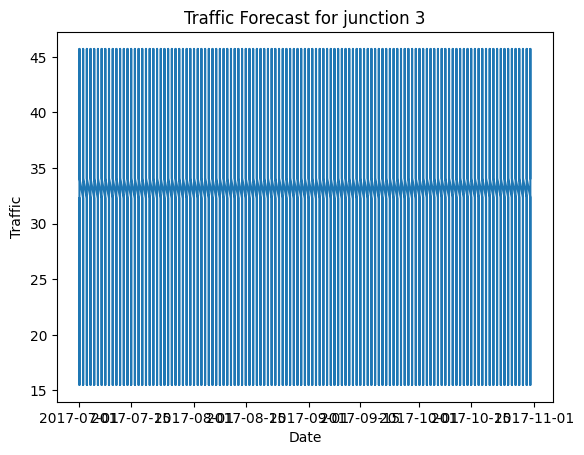

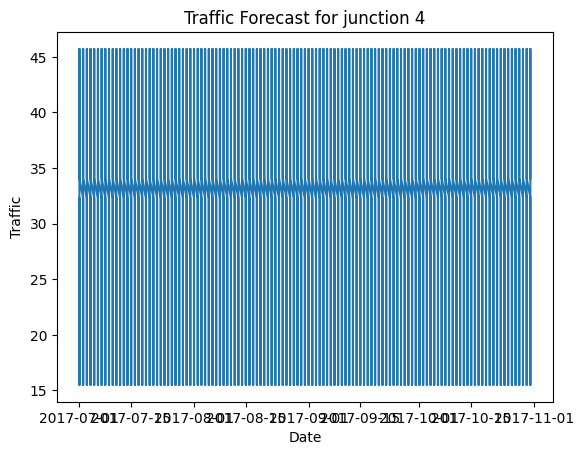

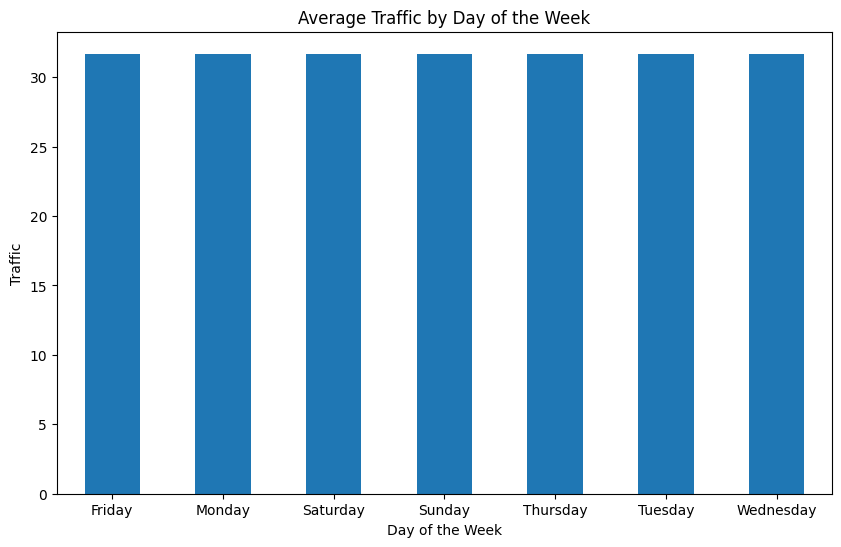

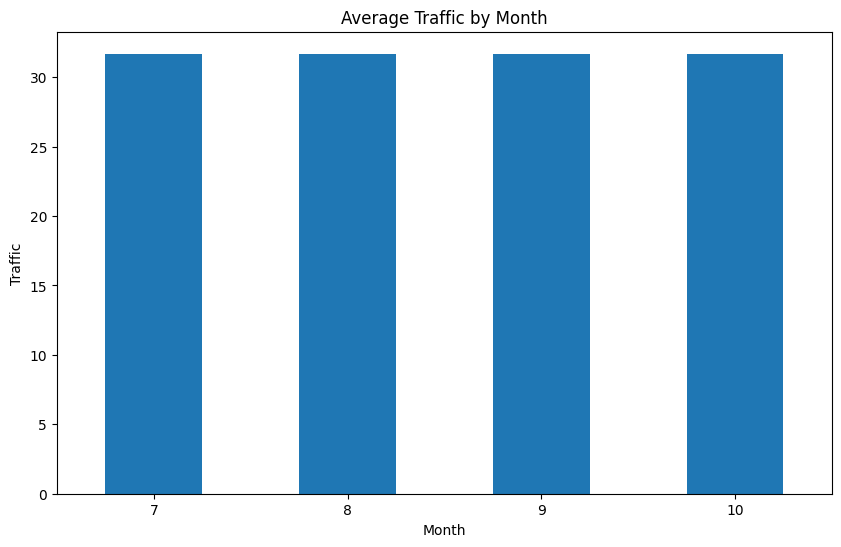

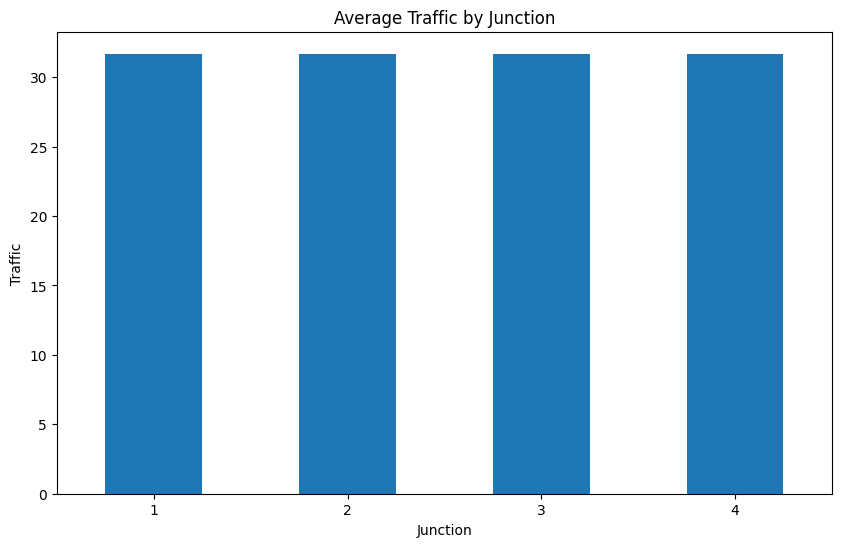

In [16]:
forecasted_traffic = rf_model.predict(dataset2[['Hour', 'Month', 'Year']])
dataset2['Predicted_Traffic'] = forecasted_traffic
plt.plot(dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast')
plt.show()
print()
print()

forecasted_traffic = rf_model.predict(junction_1_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_1_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 1')
plt.show()
print()
print()

forecasted_traffic = rf_model.predict(junction_2_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_2_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 2')
plt.show()
print()
print()

forecasted_traffic = rf_model.predict(junction_3_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_3_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 3')
plt.show()
print()
print()

forecasted_traffic = rf_model.predict(junction_4_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_4_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 4')
plt.show()
print()
print()

# Visualize traffic on different days of the week
plt.figure(figsize=(10, 6))
daily_traffic = dataset2.groupby('DayOfWeek')['Predicted_Traffic'].mean()
daily_traffic.plot(kind='bar', rot=0)
plt.xlabel('Day of the Week')
plt.ylabel('Traffic')
plt.title('Average Traffic by Day of the Week')
plt.show()
print()
print()

# Visualize traffic in different months
plt.figure(figsize=(10, 6))
monthly_traffic = dataset2.groupby('Month')['Predicted_Traffic'].mean()
monthly_traffic.plot(kind='bar', rot=0)
plt.xlabel('Month')
plt.ylabel('Traffic')
plt.title('Average Traffic by Month')
plt.show()
print()
print()

# Visualize traffic at different junctions
plt.figure(figsize=(10, 6))
junction_traffic = dataset2.groupby('Junction')['Predicted_Traffic'].mean()
junction_traffic.plot(kind='bar', rot=0)
plt.xlabel('Junction')
plt.ylabel('Traffic')
plt.title('Average Traffic by Junction')
plt.show()

NEURAL NETWORK MODEL

In [17]:
nn_model = MLPRegressor(hidden_layer_sizes=(100,), random_state=42)
nn_model.fit(X_train, y_train)

y_train_pred_nn = nn_model.predict(X_train)
y_test_pred_nn = nn_model.predict(X_test)

train_mae_nn = mean_absolute_error(y_train, y_train_pred_nn)
test_mae_nn = mean_absolute_error(y_test, y_test_pred_nn)

train_rmse_nn = mean_squared_error(y_train, y_train_pred_nn, squared=False)
test_rmse_nn = mean_squared_error(y_test, y_test_pred_nn, squared=False)

print("Neural Network - Training MAE:", train_mae_nn)
print("Neural Network - Testing MAE:", test_mae_nn)
print("Neural Network - Training RMSE:", train_rmse_nn)
print("Neural Network - Testing RMSE:", test_rmse_nn)

Neural Network - Training MAE: 14.475296591453553
Neural Network - Testing MAE: 14.104903020101755
Neural Network - Training RMSE: 20.480358813293243
Neural Network - Testing RMSE: 19.77557559104144


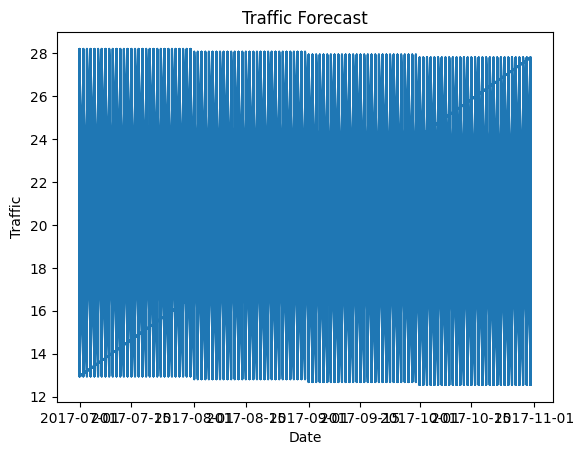

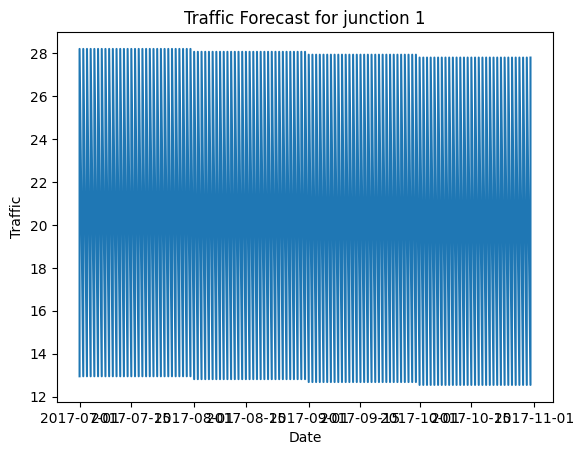

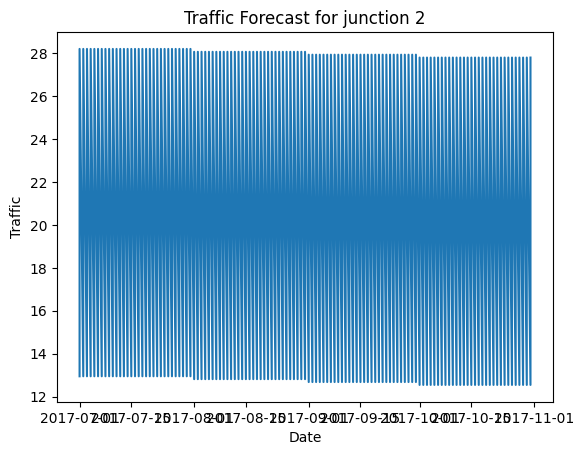

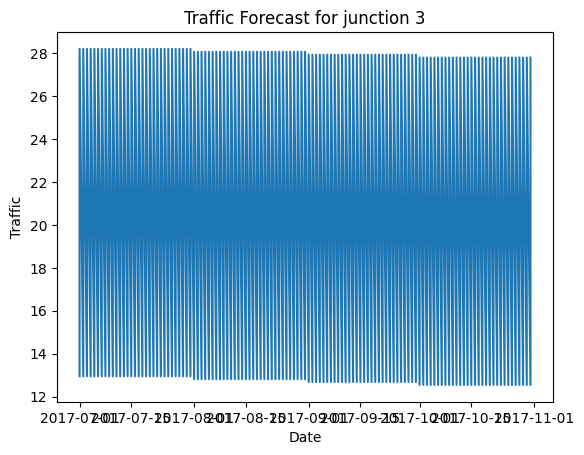

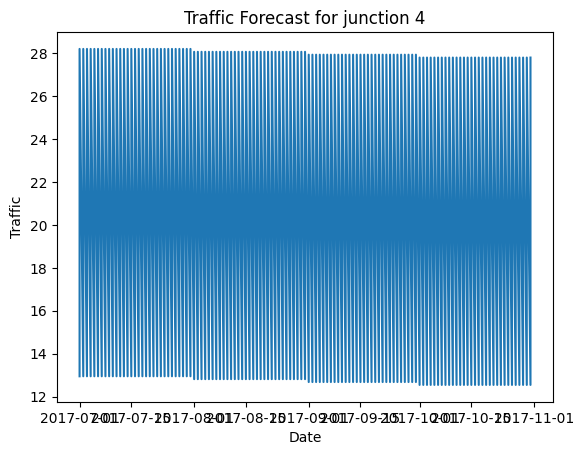

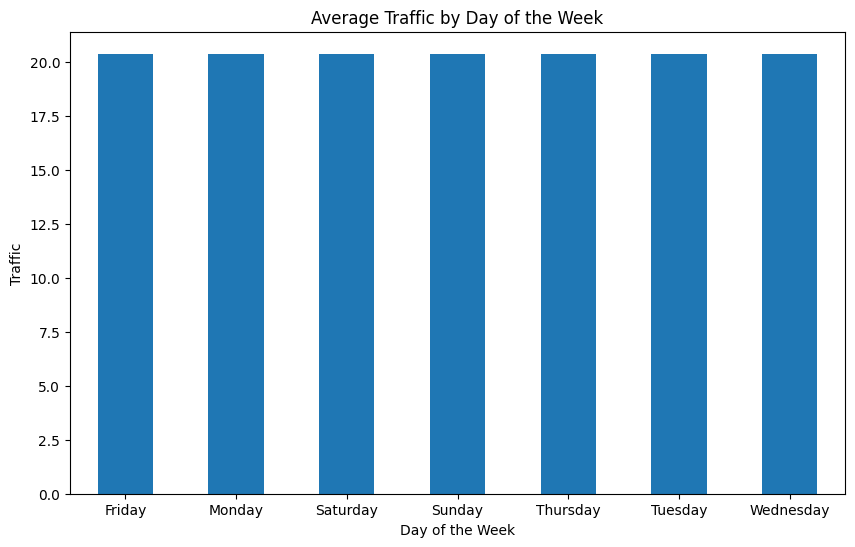

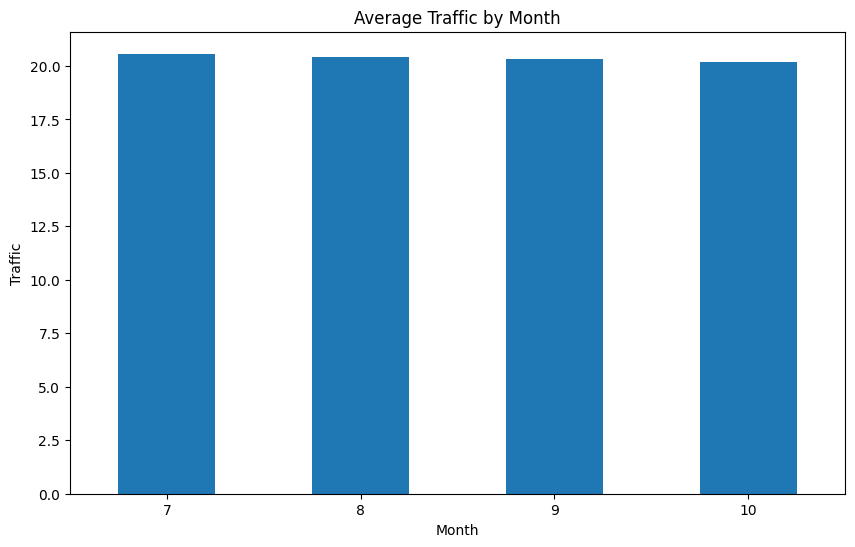

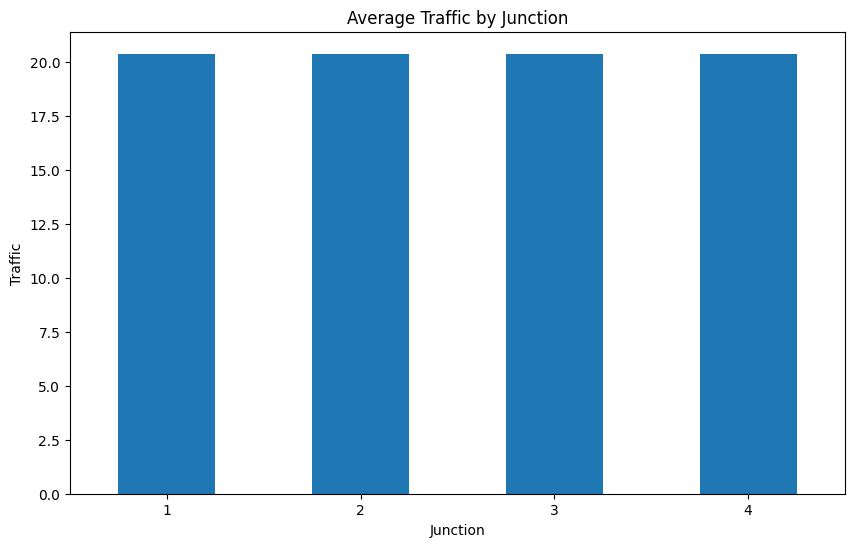

In [18]:
forecasted_traffic = nn_model.predict(dataset2[['Hour', 'Month', 'Year']])
dataset2['Predicted_Traffic'] = forecasted_traffic
plt.plot(dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast')
plt.show()
print()
print()

forecasted_traffic = nn_model.predict(junction_1_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_1_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 1')
plt.show()
print()
print()

forecasted_traffic = nn_model.predict(junction_2_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_2_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 2')
plt.show()
print()
print()

forecasted_traffic = nn_model.predict(junction_3_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_3_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 3')
plt.show()
print()
print()

forecasted_traffic = nn_model.predict(junction_4_dataset2[['Hour', 'Month', 'Year']])
plt.plot(junction_4_dataset2['Date'], forecasted_traffic)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Forecast for junction 4')
plt.show()
print()
print()

# Visualize traffic on different days of the week
plt.figure(figsize=(10, 6))
daily_traffic = dataset2.groupby('DayOfWeek')['Predicted_Traffic'].mean()
daily_traffic.plot(kind='bar', rot=0)
plt.xlabel('Day of the Week')
plt.ylabel('Traffic')
plt.title('Average Traffic by Day of the Week')
plt.show()
print()
print()

# Visualize traffic in different months
plt.figure(figsize=(10, 6))
monthly_traffic = dataset2.groupby('Month')['Predicted_Traffic'].mean()
monthly_traffic.plot(kind='bar', rot=0)
plt.xlabel('Month')
plt.ylabel('Traffic')
plt.title('Average Traffic by Month')
plt.show()
print()
print()

# Visualize traffic at different junctions
plt.figure(figsize=(10, 6))
junction_traffic = dataset2.groupby('Junction')['Predicted_Traffic'].mean()
junction_traffic.plot(kind='bar', rot=0)
plt.xlabel('Junction')
plt.ylabel('Traffic')
plt.title('Average Traffic by Junction')
plt.show()